In [406]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
import mlflow
import mlflow.sklearn
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [4]:
# Load the dataset
df = pd.read_csv("Electrical Grid Stability.csv")
df

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


# Exploratory Data Analysis (EDA)

#### Display the size of the dataset:

In [9]:
df.shape

(10000, 14)

#### Show the dataset’s basic info like number of rows/columns, data types, missing values.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


#### Display summary statistics:

In [15]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


#### This plot shows the distribution of the continuous stability indicator (stab).

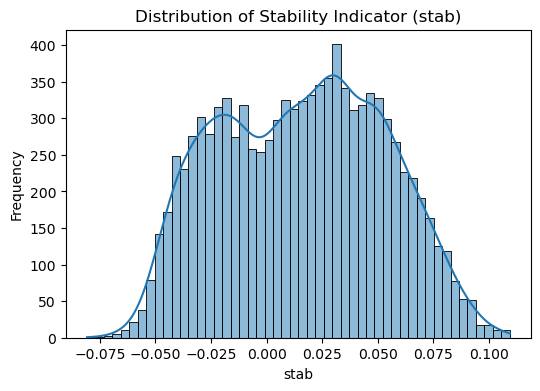

In [18]:
plt.figure(figsize=(6,4))
sns.histplot(df["stab"], bins=50, kde=True)
plt.title("Distribution of Stability Indicator (stab)")
plt.xlabel("stab")
plt.ylabel("Frequency")
plt.show()

In [19]:
# Class distribution of target variable
df["stabf"].value_counts()

stabf
unstable    6380
stable      3620
Name: count, dtype: int64

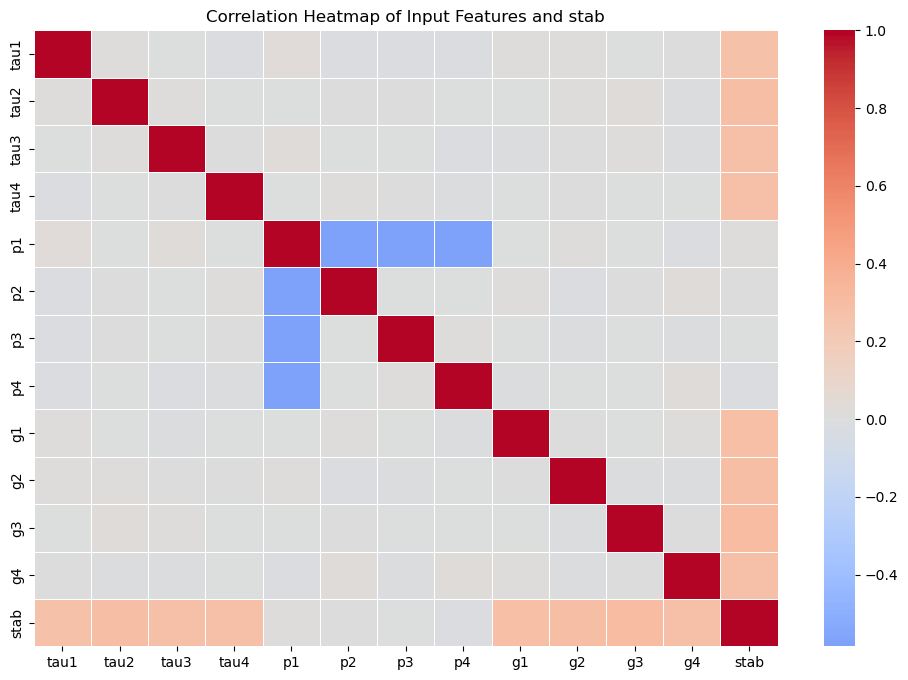

In [22]:
# stab correlation with all the features 
plt.figure(figsize=(12,8))
sns.heatmap(
    df.drop(columns=["stabf"]).corr(),
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)
plt.title("Correlation Heatmap of Input Features and stab")
plt.show()

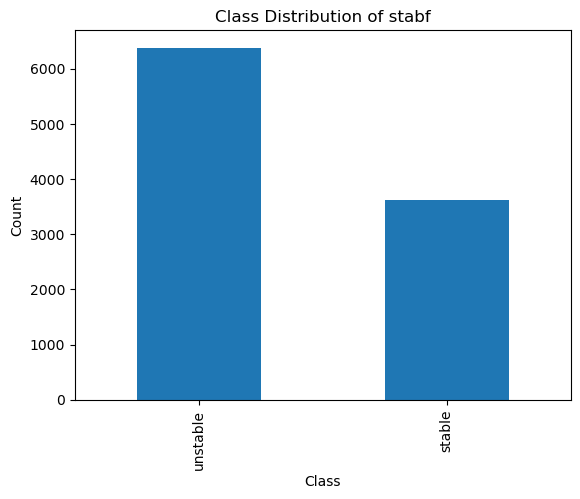

In [23]:
# Visualize class distribution
df["stabf"].value_counts().plot(kind="bar")
plt.title("Class Distribution of stabf")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

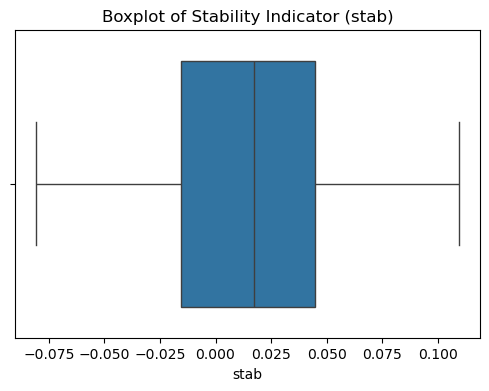

In [25]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["stab"])
plt.title("Boxplot of Stability Indicator (stab)")
plt.xlabel("stab")
plt.show()

#### Separate the dataset into features (X) and target variable (y):

In [188]:

X = df.drop(columns=["stab", "stabf"])
y_reg = df["stab"]     # regression target
y_clf = df["stabf"]    # classification target


# model linear regression

#### Scaling was not applied to regression because Linear Regression is not distance-based

In [217]:
#Train–Test Split
from sklearn.model_selection import train_test_split

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

 Configure MLflow Tracking

Set up an MLflow experiment.

Start an MLflow run.

In [222]:
#Create MLflow Experiment (Regression)
mlflow.set_experiment("Electrical_Grid_Stability_Regression")
mlflow.start_run(run_name="linear_regression_model")

<ActiveRun: >

**Train the Model**
Train Linear Regression + Log to MLflow


In [225]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)

y_pred_reg = lin_reg.predict(X_test_reg)



In [227]:
# evaluate the model performance 
mae = mean_absolute_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mean_squared_error(y_test_reg, y_pred_reg))
r2 = r2_score(y_test_reg, y_pred_reg)



    Log metrics


In [230]:
mlflow.log_metric("MAE", mae)
mlflow.log_metric("RMSE", rmse)
mlflow.log_metric("R2", r2)

Log model (THIS IS DEPLOYMENT PREP)

In [233]:
mlflow.sklearn.log_model(lin_reg, "linear_regression_model")

2026/01/20 12:36:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


In [235]:
print("Linear Regression Results:")
print("MAE :", mae)
print("RMSE:", rmse)
print("R2  :", r2)

Linear Regression Results:
MAE : 0.01755853328805239
RMSE: 0.021970456579764073
R2  : 0.6441225765951445


**Load the Model Back**

Load the model back (from MLflow).

Perform predictions using the loaded model and validate its consistency.


In [238]:
mlflow.active_run().info.run_id

'a40a2b0db60442fd88918d11e0b0178a'

In [240]:
#Load the (Trained) model from MLflow
logged_model= f"runs:/{mlflow.active_run().info.run_id}/linear_regression_model"
mlflow_loaded_model1 = mlflow.sklearn.load_model(logged_model)



In [242]:
# make sure that the model is working
type(loaded_model)

sklearn.linear_model._base.LinearRegression

In [244]:
#Make Predictions
sample_input = X_test_reg.iloc[:1]
prediction = loaded_model.predict(sample_input)

print("Predicted stab value:", prediction)

Predicted stab value: [0.03879235]


In [246]:
#Predict with the MLflow-loaded model
mlflow_predictions = mlflow_loaded_model1.predict(X_test_reg)


mae = mean_absolute_error(y_test_reg, mlflow_predictions)
rmse = mean_squared_error(y_test_reg, mlflow_predictions, squared=False)
r2 = r2_score(y_test_reg, mlflow_predictions)
print("MLflow Model Performance:")
print("MAE :", mae)
print("RMSE:", rmse)
print("R2  :", r2)

MLflow Model Performance:
MAE : 0.01755853328805239
RMSE: 0.021970456579764073
R2  : 0.6441225765951445


C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


**Save and Log the Model**

* Save the model locally and log it to MLflow as an artifact.


> joblib.dump(model, " ")



In [249]:
#Save the model locally
joblib.dump(lin_reg, "linear_regression_model.pkl")


['linear_regression_model.pkl']

In [251]:
#Log the model file as an artifact
mlflow.log_artifact("linear_regression_model.pkl")
print("Model logged to MLflow!")

Model logged to MLflow!


In [253]:
mlflow.end_run()

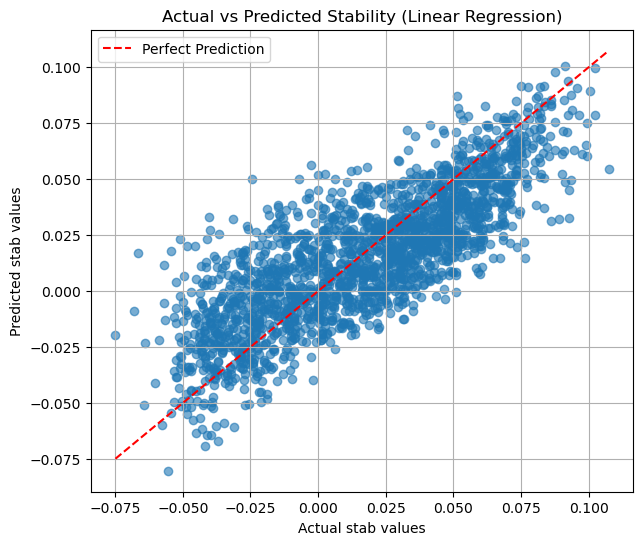

In [176]:
plt.figure(figsize=(7, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.6)
plt.plot(
    [y_test_reg.min(), y_test_reg.max()],
    [y_test_reg.min(), y_test_reg.max()],
    color="red",
    linestyle="--",
    label="Perfect Prediction"
)

plt.xlabel("Actual stab values")
plt.ylabel("Predicted stab values")
plt.title("Actual vs Predicted Stability (Linear Regression)")
plt.legend()
plt.grid(True)
plt.show()

# Feature Scaling

 ### Data Preprocessing

Separate the dataset into features (X) and target variable (y).
 Split the data into training and testing sets (80% train, 20% test).


In [77]:
# Classification split (STRATIFIED)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

In [79]:
scaler_clf = StandardScaler()
X_train_clf_scaled = scaler_clf.fit_transform(X_train_clf)
X_test_clf_scaled = scaler_clf.transform(X_test_clf)

# Model Training – KNN Classifier
### Model training with an appropriate algorithm

####  Set up an MLflow experiment.
##### Start an MLflow run.


In [83]:
#Set up the MLflow experiment
mlflow.set_experiment("Classification with MLflow")
mlflow.start_run(run_name="KNN Experiment")



<ActiveRun: >

## Train the Model

* Train the KNN classifier and log hyperparameters.

In [86]:
# Initial KNN model (baseline)
knn = KNeighborsClassifier(n_neighbors=5)


# *Hyperparameter Tuning – Choosing the Best k*

In [90]:
error_rate = []

# Test k values from 1 to 40
for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_clf_scaled, y_train_clf)
    y_pred_k = knn.predict(X_test_clf_scaled)
    error_rate.append(np.mean(y_pred_k != y_test_clf))

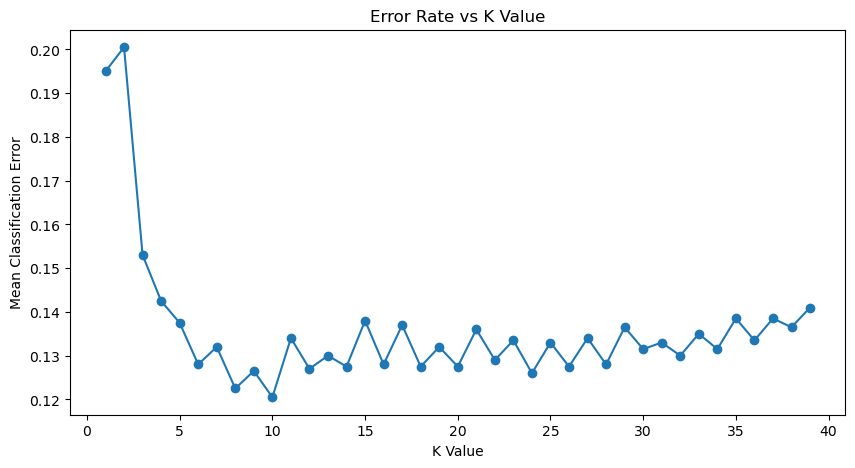

In [91]:
# Visualize error vs k
plt.figure(figsize=(10,5))
plt.plot(range(1, 40), error_rate, marker="o")
plt.title("Error Rate vs K Value")
plt.xlabel("K Value")
plt.ylabel("Mean Classification Error")
plt.show()

**The tuning curve shows how mean classification error achange with different values of k.
The best value of k was selected based on the lowest mean error score to balance performance across classes**

In [94]:
# Best k (minimum error)
best_k = range(1, 40)[error_rate.index(min(error_rate))]
best_k


10

In [96]:
mlflow.log_param("n_neighbors", best_k)

10

In [98]:

#Log the trained model
mlflow.sklearn.log_model(knn, "trained_knn_model")

2026/01/20 12:17:37 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


In [99]:
#Make predictions
y_pred = knn.predict(X_test_clf_scaled)

#Calculate metrics
accuracy = accuracy_score(y_test_clf, y_pred)
precision = precision_score(y_test_clf, y_pred, pos_label="unstable")
recall = recall_score(y_test_clf, y_pred, pos_label="unstable")
f1 = f1_score(y_test_clf, y_pred, pos_label="unstable")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
#Log metrics
mlflow.log_metric("accuracy", accuracy)
mlflow.log_metric("precision", precision)
mlflow.log_metric("recall", recall)
mlflow.log_metric("f1_score", f1)

Accuracy: 0.859
Precision: 0.8269736842105263
Recall: 0.9851097178683386
F1-score: 0.8991416309012875


# Model Evaluation (with best k)

In [103]:
# Train final KNN model with best k
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train_clf_scaled, y_train_clf)

# Predictions
y_pred = knn_final.predict(X_test_clf_scaled)

In [402]:
from sklearn.metrics import  confusion_matrix

In [392]:
# Confusion matrix
cm=confusion_matrix(y_test_clf, y_pred)
cm

array([[ 561,  163],
       [  78, 1198]], dtype=int64)

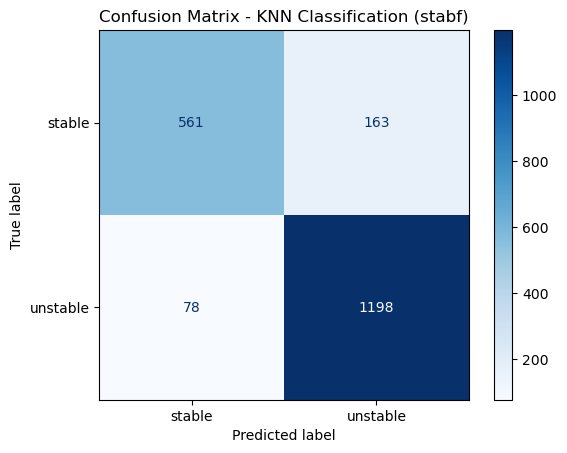

In [396]:
# Visualize the confusion matrix for easier interpretation
disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=knn_final.classes_
)

disp.plot(cmap="Blues")
plt.title("Confusion Matrix - KNN Classification (stabf)")
plt.show()


The confusion matrix shows the number of correct and incorrect predictions made by the KNN classifier. The diagonal values represent correct classifications, while the off-diagonal values indicate misclassifications. The model demonstrates strong performance, particularly in correctly identifying unstable cases, which is reflected by the high recall value. However, some stable cases are misclassified as unstable, indicating a trade-off between precision and recall.

# Load the trained model from MLflow


In [112]:
logged_model = f"runs:/{mlflow.active_run().info.run_id}/trained_knn_model"
mlflow_loaded_model = mlflow.sklearn.load_model(logged_model)

In [114]:
mlflow_predictions = mlflow_loaded_model.predict(X_test_clf_scaled)

In [116]:
mlflow_accuracy = accuracy_score(y_test_clf, mlflow_predictions)
print(f"Accuracy from MLflow-loaded model: {mlflow_accuracy}")

Accuracy from MLflow-loaded model: 0.859


In [118]:
#Save the model locally
joblib.dump(knn, "locally_saved_knn_model.pkl")


['locally_saved_knn_model.pkl']

In [120]:
#Log the model file as an artifact
mlflow.log_artifact("locally_saved_knn_model.pkl")
print("Model logged to MLflow!")

Model logged to MLflow!


In [122]:
mlflow.end_run()

# make predictions 

In [350]:
new_sample = pd.DataFrame([{
    "tau1": 4.5,
    "tau2": 3.2,
    "tau3": 5.1,
    "tau4": 4.8,
    "p1": 1.8,
    "p2":-2,
    "p3": -0.8,
    "p4": -1.0,
    "g1": 0.75,
    "g2": 0.55,
    "g3": 0.7,
    "g4": 0.66
    
}])
	

new_sample_scaled = scaler.transform(new_sample)
prediction = mlflow_loaded_model.predict(new_sample_scaled)

In [352]:
print("Predicted stabf:", prediction)


Predicted stabf: ['unstable']


In [378]:
sample_input = X_test_reg.iloc[[0]]
sample_input = sample_input[mlflow_loaded_model1.feature_names_in_]

prediction = mlflow_loaded_model1.predict(sample_input)

print("True stab:", y_test_reg.iloc[0])
print("Predicted stab:", prediction[0])

True stab: 0.0356289657352586
Predicted stab: 0.038914422418293376
